# <center>简单机器学习</center>

### 1.Random Choose Method to get optimal k* and *b

##### 准备工作

In [50]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
import random

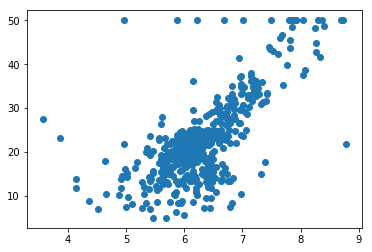

In [51]:
data= load_boston()
X, y = data['data'], data['target']
x = X[:, 5]
plt.scatter(x, y)

##### 实现方法

In [52]:
def loss_base(arg, x, y):
    k, b = arg
    y_hat = k * x + b
    return y - y_hat

def loss(k, b, x, y):
    return sum(loss_base((k, b), x, y) ** 2) / len(x)

def visual(k, b, x, y):
    loss_ = loss(k, b, x, y)
    print('拟合直线为：y = %.2fx %+.2f\nLoss=%f' % (k, b, loss_))
    plt.scatter(x, y)
    plt.scatter(x, x*k+b, c='r')
    plt.show()

def random_kb(k_limit = (-100, 100), b_limit=(-100, 100)):
    k = random.uniform(*k_limit)
    b = random.uniform(*b_limit)
    return (k, b)

# 进行多步随机k b,寻求最优解
def random_opt(step):
    opt_loss = 1e10
    opt_k = 1
    opt_k = 0
    for i in range(step):
        k, b = random_kb()
        loss_ = loss(k, b, x, y)
        if loss_ < opt_loss:
            opt_k, opt_b, opt_loss = k, b, loss_
    return(opt_k, opt_b) 

##### 结果测试

拟合直线为：y = -41.59x -51.64
Loss=113903.892388


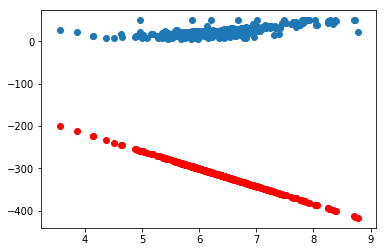

In [53]:
# 随机k, b
step = 1
visual(*random_opt(step), x, y)

拟合直线为：y = 7.41x -25.51
Loss=47.264446


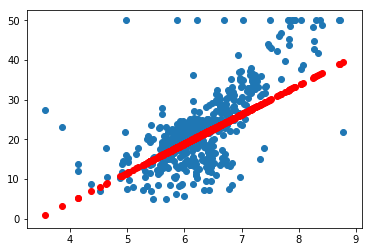

In [54]:
step = 500
visual(*random_opt(step), x, y)

拟合直线为：y = 4.61x -6.55
Loss=53.564277


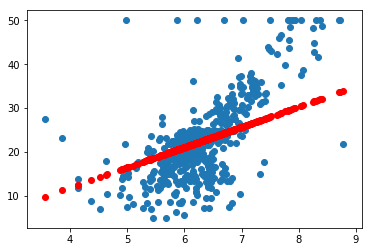

In [55]:
step = 1000
visual(*random_opt(step), x, y)

拟合直线为：y = 11.02x -46.43
Loss=45.512934


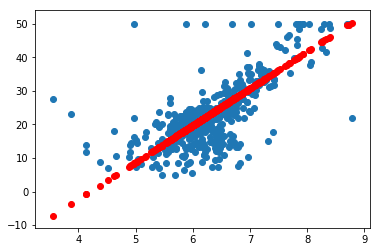

In [56]:
step = 10000
visual(*random_opt(step), x, y)

##### 验证（采用scipy.optimaze.leastsq方法进行拟合）结果如下：

拟合直线为：y = 9.10x -34.67
Loss=43.600552


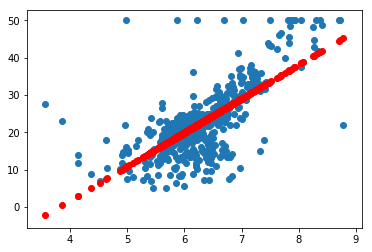

In [57]:
opti_kb = leastsq(loss_base, np.array([1, 0]), args=(x, y))
k0, b0 = opti_kb[0]
visual(k0, b0, x, y)

## 2.Supervised Direction to get optimal k* and *b

In [58]:
def random_opt_with_direc(step=1000, scalar=0.1, x=None, y=None):
    direction = [
        (1, 1),
        (1, -1),
        (-1, 1),
        (-1, -1)
    ]
    best_loss = 1e20
    best_k, best_b = random_kb()
    k_direc, b_direc = random.choice(direction) 
    for i in range(step):
        current_k, current_b = best_k+k_direc*scalar, best_b+b_direc*scalar
        loss_ = loss(current_k, current_b, x, y)
        if loss_ < best_loss:
            best_k = current_k
            best_b = current_b
            best_loss = loss_
        else:
            k_direc, b_direc = random.choice(direction) 
    return (best_k, best_b)

拟合直线为：y = 13.64x -63.35
Loss=53.767312


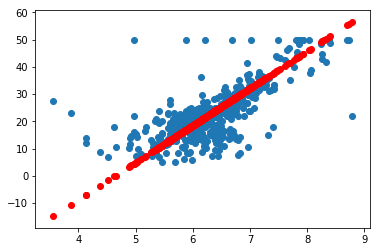

In [59]:
visual(*random_opt_with_direc(10000, 0.1, x, y), x, y)

## 3. Gradient Descent to get optimal k* and *b

$$Loss = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 =  \frac{1}{n} \sum (y_i - (kx_i+b))^2$$


$$\frac{\partial{Loss}}{\partial{k}} = - \frac{2}{n} \sum (y_i - kx_i - b) x_i$$

$$\frac{\partial{Loss}}{\partial{b}} = - \frac{2}{n} \sum (y_i - kx_i - b)$$

In [60]:
def partial_k(k, b, x, y):
    return -2*sum((y - k * x - b) * x) / len(x)

def partial_b(k, b, x, y):
    return -2*sum(y - k * x - b) / len(x)

In [61]:
def gradient_descent(step, rate, x, y):
    best_loss = 1e20
    k, b = random_kb()
    for i in range(step):
        loss_ = loss(k, b, x, y)
        if loss_ < best_loss:
            best_k = k
            best_b = b
            best_loss = loss_
        else:
            k_gradient = partial_k(k, b, x, y)
            b_gradient = partial_b(k, b, x, y)
            k -= k_gradient*rate
            b -= b_gradient*rate
    return (best_k, best_b)

拟合直线为：y = 4.02x -2.34
Loss=56.477963


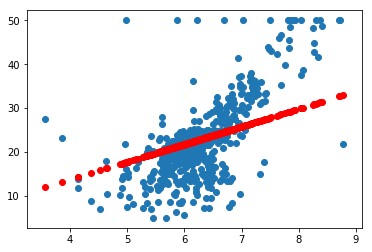

In [62]:
visual(*gradient_descent(10000, 0.01, x, y), x, y)

## 4. Try different Loss function and learning rate.

$$Loss = \frac{1}{n} \sum \vert y_i - \hat{y}_i \vert =  \frac{1}{n} \sum \vert y_i - (kx_i+b) \vert$$


$$\frac{\partial{Loss}}{\partial{k}} =\frac{1}{n} \sum sign \cdot x 
    ,\begin{cases}
    sign=-1 & \text{, $y_i - \hat{y}_i \ge 0$} \\
    sign=1 & \text{, $y_i - \hat{y}_i \lt 0$} 
    \end{cases}
$$


$$\frac{\partial{Loss}}{\partial{b}} =\frac{1}{n} \sum sign
    ,\begin{cases}
    sign=-1 & \text{, $y_i - \hat{y}_i \ge 0$} \\
    sign=1 & \text{, $y_i - \hat{y}_i \lt 0$} 
    \end{cases}
$$


In [63]:
def loss_1(k, b, x, y):
    return sum(np.fabs(loss_base((k, b), x, y))) / len(x)

def visual_1(k, b, x, y):
    loss_ = loss_1(k, b, x, y)
    print('拟合直线为：y = %.2fx %+.2f\nLoss=%f' % (k, b, loss_))
    plt.scatter(x, y)
    plt.scatter(x, x*k+b, c='r')
    plt.show()

def partial_k(k, b, x, y):
    dis = loss_base((k, b), x, y)
    sign = -np.sign(dis)
    return sum(sign * x) / len(x)

def partial_b(k, b, x, y):
    dis = loss_base((k, b), x, y)
    sign = -np.sign(dis)
    return sum(sign) / len(x)

def gradient_descent_1(step, rate, x, y):
    best_loss = 1e20
    k, b = random_kb()
    for i in range(step):
        loss_ = loss1(k, b, x, y)
        if loss_ < best_loss:
            best_k = k
            best_b = b
            best_loss = loss_
        else:
            k_gradient = partial_k(k, b, x, y)
            b_gradient = partial_b(k, b, x, y)
            k -= k_gradient*rate
            b -= b_gradient*rate
    return (best_k, best_b)

拟合直线为：y = 6.41x -17.84
Loss=4.764765


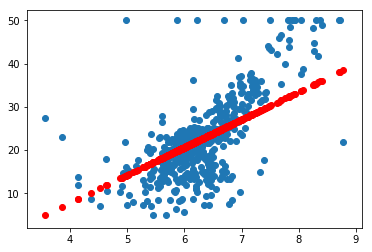

In [69]:
visual_1(*gradient_descent_1(15000, 0.01, x, y), x, y)

##### 验证（采用scipy.optimaze.leastsq方法进行拟合）结果如下：


拟合直线为：y = 9.70x -38.22
Loss=4.436110


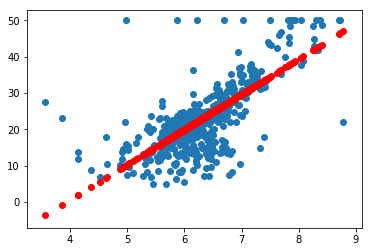

In [70]:
def loss_base_1(arg, x, y):
    k, b = arg
    y_hat = k * x + b
    return np.sqrt(np.fabs(y - y_hat))
res = leastsq(loss_base_1, np.array([1, 0]), args=(x, y))
visual_1(*res[0], x, y)

# <center>总结</center>

+ 带有方向指导的随机方法 和 梯度下降方法，初始值和步长的设定需要合理才能寻得比较优秀的解
+ 初始值和步长二者具有相关性；在相同迭代次数的前提下，初始值设置的离最优解较远，需要增大学习率。